# Online Business Retail Sales Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [2]:
# source data: https://www.kaggle.com/tylermorse/retail-business-sales-20172019?select=business.retailsales.csv
prod_df = pd.read_csv('./business.retailsales.csv')

In [3]:
month_df = pd.read_csv('./business.retailsales2.csv')

### Initial Data Exploration

In [4]:
prod_df

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Art & Sculpture,34,14935.0,-594.00,-1609.00,12732.00
1,Basket,13,3744.0,-316.80,0.00,3427.20
2,Basket,12,3825.0,-201.60,-288.00,3335.40
3,Basket,17,3035.0,-63.25,0.00,2971.75
4,Art & Sculpture,47,2696.8,-44.16,0.00,2652.64
...,...,...,...,...,...,...
1770,Kitchen,0,28.0,-2.81,-25.19,0.00
1771,Jewelry,0,28.0,0.00,-28.00,0.00
1772,Basket,0,116.0,-23.20,-92.80,0.00
1773,Kitchen,0,16.5,0.00,-16.50,0.00


#### Initial thoughts on prod df:
1. There is no Timestamp, Order ID, or Customer ID to check for repeat customers, segmentation profiles, or check what product types are frequently bought together. Also can't check for seasonality of certain items.
2. We can determine the Product Types that generate the majority of the sales and focus on its importance.
3. We can determine the higher average net sales per unit sold and focus on these as well.

In [5]:
month_df.head()

,Month,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
0,January,2017,73,8861.5,-129.40,-448.45,8283.65,1088.30,9371.95
1,February,2017,56,6908.5,-104.70,-416.20,6387.60,892.45,7280.05
2,March,2017,60,5778.5,-172.20,-1017.20,4589.10,707.43,5296.53
3,April,2017,70,8814.0,-281.40,0.00,8532.60,1068.30,9600.90
4,May,2017,54,6677.0,-185.75,-253.80,6237.45,866.46,7103.91


#### Initial thoughts on month df:
1. Appears to have monthly data from Jan 2017 - December 2019 (3 full years)
2. Assume Shipping column is additional money on top of sale price that is collected from customer, but then
passed through to 3rd party shipping company. This column is basically noise for us. Additionally, Total Sales is just Net Sales + Shipping. Therefore, Total Sales is also noise. We can delete those columns. We could check that Shipping stays roughly constant percent of Total Sales to ensure above assumptions are reasonable.
3. Need to plot Gross Sales in chronological order. Then also plot and compare Januarys vs other Januarys etc. Check for seasonality issues.
4. Plot stacked bar chart in chronological order with Net Sales (color 1) on Discount (color 2) on Returns (color 3)

## Questions:
1. Which month between 2017-2019 had the highest Net Sales?
2. Are there any seasonality considerations? Plot month vs month side by side
3. Which product types generate the majority of sales? Which product types have the highest average net sales per unit sold?

### 1. Which month between 2017-2019 had the highest Net Sales?

In [6]:
month_df['Year'] = month_df['Year'].astype(str)
month_df['Month/Year'] = month_df['Month'].str.cat(month_df['Year'], sep=' ')
month_df

,Month,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales,Month/Year
0,January,2017,73,8861.50,-129.40,-448.45,8283.65,1088.30,9371.95,January 2017
1,February,2017,56,6908.50,-104.70,-416.20,6387.60,892.45,7280.05,February 2017
2,March,2017,60,5778.50,-172.20,-1017.20,4589.10,707.43,5296.53,March 2017
3,April,2017,70,8814.00,-281.40,0.00,8532.60,1068.30,9600.90,April 2017
4,May,2017,54,6677.00,-185.75,-253.80,6237.45,866.46,7103.91,May 2017
5,June,2017,68,9621.50,-234.45,-17.50,9369.55,1204.32,10573.87,June 2017
6,July,2017,66,6480.00,-51.50,-469.20,5959.30,807.36,6766.66,July 2017
7,August,2017,55,8025.00,-258.90,-26.00,7740.10,843.46,8583.56,August 2017
8,September,2017,68,7075.00,-61.70,-281.00,6732.30,907.32,7639.62,September 2017
9,October,2017,59,5720.00,-88.00,-305.00,5327.00,695.42,6022.42,October 2017


In [7]:
order = month_df.sort_values(by='Net Sales')['Month/Year'].to_list()

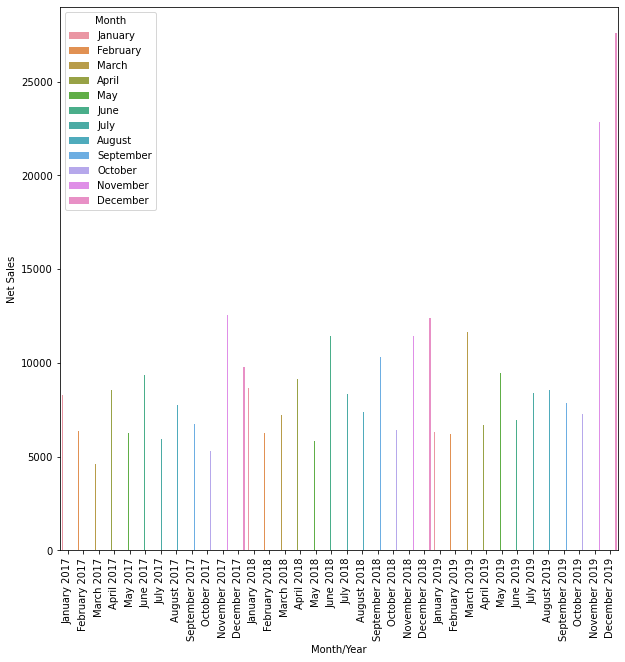

In [8]:
#Figure 1.1
plt.figure(figsize=(10,10))
ax = sns.barplot(data=month_df, x='Month/Year', y='Net Sales', hue='Month')
plt.xticks(rotation='vertical')
plt.show()

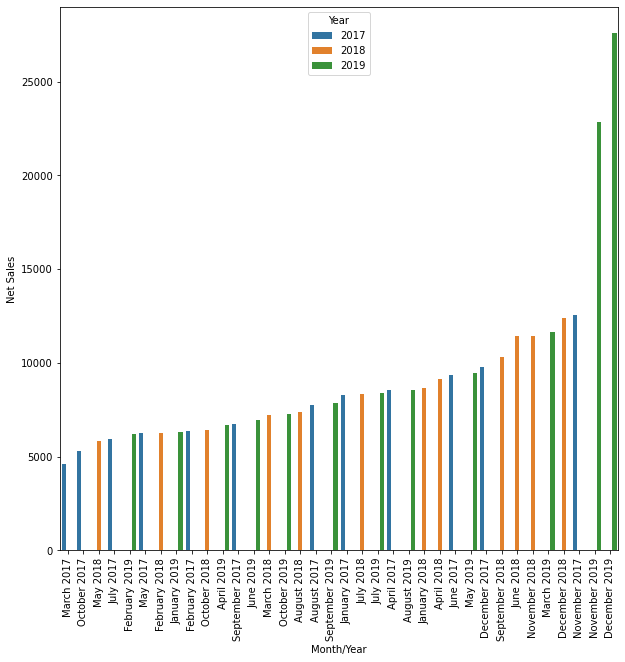

In [9]:
#Figure 1.2
plt.figure(figsize=(10,10))
ax = sns.barplot(data=month_df, x='Month/Year', y='Net Sales', hue='Year', order = order)
plt.xticks(rotation='vertical')
plt.show()

### Answer 1: December 2019 had the highest net sales

### Question 2: Are there any seasonality considerations?

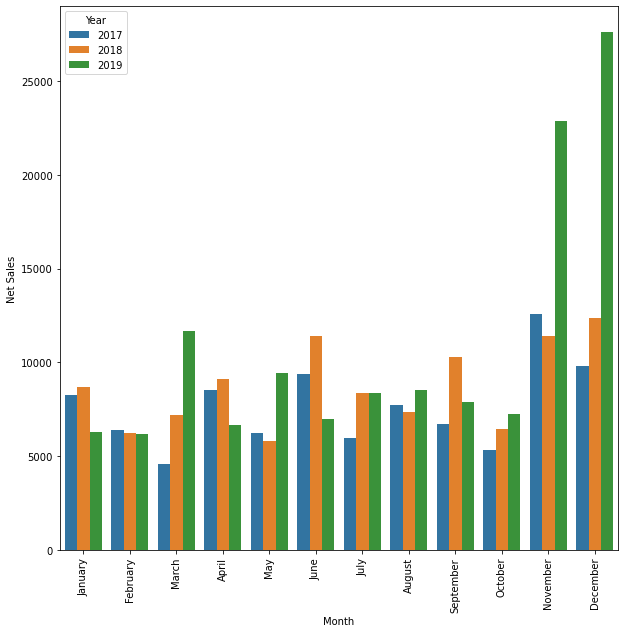

In [10]:
#Figure 2.1
plt.figure(figsize=(10,10))
ax = sns.barplot(data=month_df, x='Month', y='Net Sales', hue='Year')
plt.xticks(rotation='vertical')
plt.show()

In [11]:
#Table 2.1A
month_df.groupby('Month').mean().sort_values(by='Net Sales')

,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
Month,,,,,,,
February,62.666667,6653.800000,-184.916667,-191.016667,6277.866667,974.403333,7252.270000
October,75.666667,7288.916667,-215.123333,-724.100000,6349.693333,1196.373333,7546.066667
May,77.333333,8084.383333,-289.300000,-625.056667,7170.026667,1289.870000,8459.896667
July,87.333333,8498.050000,-245.480000,-689.310000,7563.260000,1355.263333,8918.523333
January,81.000000,8532.083333,-202.823333,-575.016667,7754.243333,1194.086667,8949.230000
March,74.333333,8765.566667,-279.623333,-669.000000,7816.943333,1349.816667,9166.760000
August,80.666667,8187.733333,-200.380000,-102.573333,7884.780000,1324.080000,9208.860000
April,81.000000,8399.116667,-266.360000,-16.666667,8116.090000,1266.103333,9382.193333
September,78.333333,8911.766667,-230.913333,-378.116667,8302.736667,1369.766667,9672.503333


In [12]:
#Table 2.1B
#aggregation below only uses index rows 0-33, which excludes Nov and Dec 2019. Check to see how data looks 
# assuming those are outliers
month_df.iloc[0:34].groupby('Month').mean().sort_values(by='Net Sales')

,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
Month,,,,,,,
February,62.666667,6653.800000,-184.916667,-191.016667,6277.866667,974.403333,7252.270000
October,75.666667,7288.916667,-215.123333,-724.100000,6349.693333,1196.373333,7546.066667
May,77.333333,8084.383333,-289.300000,-625.056667,7170.026667,1289.870000,8459.896667
July,87.333333,8498.050000,-245.480000,-689.310000,7563.260000,1355.263333,8918.523333
January,81.000000,8532.083333,-202.823333,-575.016667,7754.243333,1194.086667,8949.230000
March,74.333333,8765.566667,-279.623333,-669.000000,7816.943333,1349.816667,9166.760000
August,80.666667,8187.733333,-200.380000,-102.573333,7884.780000,1324.080000,9208.860000
April,81.000000,8399.116667,-266.360000,-16.666667,8116.090000,1266.103333,9382.193333
September,78.333333,8911.766667,-230.913333,-378.116667,8302.736667,1369.766667,9672.503333


In [13]:
#Table 2.2
month_df.groupby('Month')['Net Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
April,3.0,8116.090000,1278.187275,6681.60,7607.100,8532.60,8833.335,9134.07
August,3.0,7884.780000,609.360831,7360.78,7550.440,7740.10,8146.780,8553.46
December,3.0,16593.053333,9622.744596,9792.00,11087.975,12383.95,19993.580,27603.21
February,3.0,6277.866667,98.711414,6196.30,6223.000,6249.70,6318.650,6387.60
January,3.0,7754.243333,1275.368722,6299.43,7291.540,8283.65,8481.650,8679.65
July,3.0,7563.260000,1389.188548,5959.30,7153.200,8347.10,8365.240,8383.38
June,3.0,9252.916667,2226.562268,6970.33,8169.940,9369.55,10394.210,11418.87
March,3.0,7816.943333,3572.037117,4589.10,5898.090,7207.08,9430.865,11654.65
May,3.0,7170.026667,1983.551605,5824.63,6031.040,6237.45,7842.725,9448.00


In [14]:
#Table 2.3
month_df.groupby('Year')['Net Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2017,12.0,7626.708333,2235.805166,4589.10,6167.9125,7236.200,8741.8375,12569.85
2018,12.0,8732.348333,2230.236127,5824.63,7015.7600,8513.375,10584.7425,12383.95
2019,12.0,10816.366667,6975.314319,6196.30,6898.1475,8126.295,9999.6625,27603.21


In [15]:
#Table 2.4
month_df.groupby('Year').sum()

,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
Year,,,,,,,
2017,836,97342.05,-1849.15,-3972.40,91520.50,11976.77,103497.27
2018,1141,113313.15,-3112.39,-5412.58,104788.18,18780.10,123568.28
2019,1520,143762.15,-6252.24,-7713.51,129796.40,26101.23,155900.33


In [16]:
y = month_df.groupby('Year').sum()['Net Sales']
y = y.to_list()

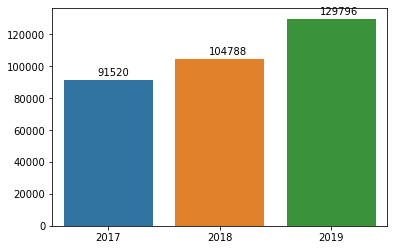

In [17]:
#Figure 2.2
bar_year = sns.barplot(x=[2017, 2018, 2019], y=y)

for i in range(0,len(y)):
    bar_year.text(s=int(y[i]), y=y[i]+2500, x=i-.1)
    
plt.show()

As we can see from Table 2.4 and Figure 2.2, yearly Net Sales have grown each year. 2019 experienced more growth than 2017 and 2018 primarily because of outstanding sales in November and December 2019 as shown in Figure 2.1. Table 2.1A shows the mean Net Sales by month aggregate by year. November and December historically have substantially higher sales than any other months. Additionally, months immediately pre and post the holidays (Jan, Feb, Oct) have some of the lowest mean Net Sales. 

Figure 2.1 does show that November and December of 2019 could be outliers. The standard deviation shown in Table 2.3 for aggregated yearly Net Sales has a 2019 standard deviation of 3 times previous years. Table 2.2 aggregated monthly Net Sales shows 2-3 times the standard deviation for November and December as the next closest month's standard deviation. To check how the data would present if it was assumed November and December of 2019 were outliers, Table 2.1B was generated excluding those 2 months for only that year. Even with that exclusion, historically November and December are still the dominant sales months with approximately 25% increase over the next closest month.

### Answer 2: There are significant seasonality considerations.

## Question 3: Which product types generate the majority of sales? Which product types have the highest average net sales per unit sold?

In [18]:
#Table 3.1
prod_df['Net Sale Per Unit'] = prod_df['Total Net Sales'] / prod_df['Net Quantity']
prod_df.sort_values(by='Net Sale Per Unit', ascending=False)

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales,Net Sale Per Unit
13,Art & Sculpture,2,1625.0,-5.00,0.00,1620.0,810.000000
57,Art & Sculpture,2,1150.0,-230.00,0.00,920.0,460.000000
25,Art & Sculpture,3,1660.0,0.00,-365.00,1295.0,431.666667
171,One-of-a-Kind,1,450.0,-45.00,0.00,405.0,405.000000
178,Art & Sculpture,1,385.0,0.00,0.00,385.0,385.000000
...,...,...,...,...,...,...,...
1769,Christmas,0,380.0,0.00,-380.00,0.0,NaN
1770,Kitchen,0,28.0,-2.81,-25.19,0.0,NaN
1771,Jewelry,0,28.0,0.00,-28.00,0.0,NaN
1772,Basket,0,116.0,-23.20,-92.80,0.0,NaN


In [19]:
#Table 3.2

prod_df.sort_values(by='Net Sale Per Unit', ascending=False)

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales,Net Sale Per Unit
13,Art & Sculpture,2,1625.0,-5.00,0.00,1620.0,810.000000
57,Art & Sculpture,2,1150.0,-230.00,0.00,920.0,460.000000
25,Art & Sculpture,3,1660.0,0.00,-365.00,1295.0,431.666667
171,One-of-a-Kind,1,450.0,-45.00,0.00,405.0,405.000000
178,Art & Sculpture,1,385.0,0.00,0.00,385.0,385.000000
...,...,...,...,...,...,...,...
1769,Christmas,0,380.0,0.00,-380.00,0.0,NaN
1770,Kitchen,0,28.0,-2.81,-25.19,0.0,NaN
1771,Jewelry,0,28.0,0.00,-28.00,0.0,NaN
1772,Basket,0,116.0,-23.20,-92.80,0.0,NaN


In [20]:
#Table 3.3

pivot1 = prod_df.groupby('Product Type').sum().sort_values(by='Total Net Sales', ascending=False)
pivot1['% Total Net Sales'] = 100 * pivot1['Total Net Sales'] / pivot1['Total Net Sales'].sum()
pivot1['Net Sale Per Unit (Aggregate)'] = pivot1['Total Net Sales'] / pivot1['Net Quantity']
pivot1.sort_values(by='Net Sale Per Unit (Aggregate)', ascending = False)

,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales,Net Sale Per Unit,% Total Net Sales,Net Sale Per Unit (Aggregate)
Product Type,,,,,,,,
One-of-a-Kind,12,2180.00,-71.99,0.00,2108.01,2108.010000,0.632877,175.667500
Basket,1461,143815.50,-4584.42,-4439.69,134791.39,54670.977476,40.467697,92.259678
Furniture,27,2034.00,-169.04,0.00,1864.96,1213.471667,0.559907,69.072593
Home Decor,404,27114.55,-991.21,-423.35,25699.99,7942.120824,7.715770,63.613837
Art & Sculpture,1427,90316.60,-2955.82,-2879.93,84480.85,21839.032931,25.363233,59.201717
Accessories,84,3892.40,-107.02,0.00,3785.38,2233.034667,1.136464,45.064048
Textiles,43,1889.00,-112.90,-97.00,1679.10,490.850000,0.504107,39.048837
Recycled Art,99,3792.80,-88.64,0.00,3704.16,1143.600267,1.112080,37.415758
Easter,1,38.00,-3.80,0.00,34.20,34.200000,0.010268,34.200000


In [21]:
#Table 3.4

pivot1.sort_values(by='Total Net Sales', ascending = False)

,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales,Net Sale Per Unit,% Total Net Sales,Net Sale Per Unit (Aggregate)
Product Type,,,,,,,,
Basket,1461,143815.50,-4584.42,-4439.69,134791.39,54670.977476,40.467697,92.259678
Art & Sculpture,1427,90316.60,-2955.82,-2879.93,84480.85,21839.032931,25.363233,59.201717
Jewelry,991,31048.00,-965.85,-509.20,29572.95,7082.414482,8.878528,29.841524
Home Decor,404,27114.55,-991.21,-423.35,25699.99,7942.120824,7.715770,63.613837
Kitchen,809,16096.00,-431.11,-328.07,15336.82,4318.480516,4.604491,18.957750
Christmas,575,15476.00,-345.19,-670.00,14460.81,1936.785878,4.341491,25.149235
Soapstone,199,4795.50,-96.91,-69.50,4629.09,1511.687742,1.389767,23.261759
Accessories,84,3892.40,-107.02,0.00,3785.38,2233.034667,1.136464,45.064048
Kids,140,3838.00,-116.66,0.00,3721.34,1673.796667,1.117238,26.581000


In [22]:
#Table 3.5

prod_df.groupby('Product Type')['Total Net Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Product Type,,,,,,,,
Accessories,39.0,97.061026,81.453180,22.00,45.200,68.00,113.795,458.00
Art & Sculpture,337.0,250.685015,748.739451,13.20,44.000,111.50,240.000,12732.00
Basket,551.0,244.630472,365.785257,0.00,82.405,145.00,220.000,3427.20
Christmas,73.0,198.093288,312.926853,0.00,44.000,104.40,229.600,2114.41
Easter,1.0,34.200000,NaN,34.20,34.200,34.20,34.200,34.20
Fair Trade Gifts,28.0,78.738214,97.639233,12.00,24.750,45.00,73.500,412.40
Furniture,16.0,116.560000,71.530467,33.75,69.800,103.00,139.250,280.00
Gift Baskets,1.0,19.500000,NaN,19.50,19.500,19.50,19.500,19.50
Home Decor,131.0,196.183130,275.114558,18.00,60.800,110.20,190.950,1701.15


In [23]:
#Table 3.6

pivot1.sort_values(by='Net Quantity', ascending = False)

,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales,Net Sale Per Unit,% Total Net Sales,Net Sale Per Unit (Aggregate)
Product Type,,,,,,,,
Basket,1461,143815.50,-4584.42,-4439.69,134791.39,54670.977476,40.467697,92.259678
Art & Sculpture,1427,90316.60,-2955.82,-2879.93,84480.85,21839.032931,25.363233,59.201717
Jewelry,991,31048.00,-965.85,-509.20,29572.95,7082.414482,8.878528,29.841524
Kitchen,809,16096.00,-431.11,-328.07,15336.82,4318.480516,4.604491,18.957750
Christmas,575,15476.00,-345.19,-670.00,14460.81,1936.785878,4.341491,25.149235
Home Decor,404,27114.55,-991.21,-423.35,25699.99,7942.120824,7.715770,63.613837
Soapstone,199,4795.50,-96.91,-69.50,4629.09,1511.687742,1.389767,23.261759
Kids,140,3838.00,-116.66,0.00,3721.34,1673.796667,1.117238,26.581000
Fair Trade Gifts,110,2258.00,-53.33,0.00,2204.67,730.585074,0.661896,20.042455


#### Answer 3: Table 3.4 shows Total Net Sales aggregated by Product Type are the highest for baskets (135k and 40% of total),  arts & sculpture (84k and 25% of total), Jewelry (30k and 9%), and Home Decor (26k and 8%). These 4 Product Types account for 80% of all sales. Additionally from Table 3.3, when ordered by Net Sale Per Unit (aggregated through the entire dataset), the order is as follows, baskets (2nd), art & sculpture (5th) , jewelry (10th) , and home decor (4th). Table 3.6 shows the Net Quantity aggregated by Product Type. Baskets, Art & Sculpture, and Jewelry are the top 3, and Home Decor is 6th. 

Final Comment:
Unfortunately, this analysis could not continue to drill into which products are selling in which months because we do not have timestamps for orders. This would've allowed a strategy to determine how to increase sales in lower net sales months.